In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyosrd import OSRD
OSRD.use_cases

['c1',
 'c1_with_blocks',
 'c1y2',
 'c1y2_2trains',
 'c2x2',
 'c2xx2',
 'c2y13s',
 'c2y1sy2sy1s',
 'c2y1y2',
 'c2y1y2y',
 'c2z2z2',
 'c3y1',
 'c3yy1yy3',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line']

In [3]:
OSRD.scenarii


['c1_delay',
 'c1y2_2trains_conflict',
 'c1y2_2trains_no_conflict',
 'c2y11s_conflict_20_trains',
 'c2y1y2y_2_trains_no_conflict',
 'c2y1y2y_2_trains_reorder',
 'c2y1y2y_2_trains_same_order']

In [4]:
import importlib
from importlib.resources import files
import pyosrd.scenarii as scenarii
from pyosrd.agents.scheduler_agent import SchedulerAgent
from pyosrd.schedules import Schedule
import pyosrd.schedules.weights as weights

import pandas as pd

In [6]:
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent
from pyosrd.agents.scheduler_agent import regulate_all_scenarii_with_all_agents

agent1 = OrtoolsAgent("cp_agent")
agent1.allow_change_order = True

agent2 = OrtoolsAgent("cp_agent_no_change_order")
agent2.allow_change_order = False

data = regulate_all_scenarii_with_all_agents(OSRD.scenarii, [agent1, agent2])

[13:56:03,717] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[13:56:03,742] [INFO]              [FullInfra] parsing infra
[13:56:03,803] [INFO]              [FullInfra] adaptation to kotlin
[13:56:03,826] [INFO]              [FullInfra] loading signals
[13:56:03,833] [INFO]              [FullInfra] building blocks
[13:56:03,836] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[13:56:03,849] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.4
[13:56:03,900] [DEBUG]             [Allowance] computing range n°1
[13:56:03,902] [DEBUG]             [Allowance]   computing section n°1
[13:56:03,902] [DEBUG]             [Allowance]   target time = 310.84094999999996
[13:56:03,903] [DEBUG]             [Allowance]     starting attempt 1
[13:56:03,904] [DEBUG]             [Allowance]     envelope time 518.958
[13:56:03,904] [DEBUG]             [Allowance]     starting attempt 2
[13:56:03,904] [DEBUG]             [Allow

In [7]:
print(data)

                              cp_agent  cp_agent_no_change_order
c1_delay                         420.0                     420.0
c1y2_2trains_conflict            104.0                     104.0
c1y2_2trains_no_conflict           0.0                       0.0
c2y1y2y_2_trains_no_conflict      30.0                      30.0
c2y1y2y_2_trains_reorder         566.0                     866.0
c2y1y2y_2_trains_same_order      419.0                     419.0


[13:56:24,570] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[13:56:24,600] [INFO]              [FullInfra] parsing infra
[13:56:24,663] [INFO]              [FullInfra] adaptation to kotlin
[13:56:24,690] [INFO]              [FullInfra] loading signals
[13:56:24,695] [INFO]              [FullInfra] building blocks
[13:56:24,699] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[13:56:24,712] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.28
[13:56:24,754] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.29
[13:56:24,758] [INFO]  [StandaloneSimulationCommand] All simulations completed
[13:56:24,758] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json
[13:56:25,015] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[13:56:25,045] [INFO]              [FullInfra] parsing infra
[13:56:25,105] [INFO]              [FullInfra] adaptation to

,cp_agent
c1y2_2trains_conflict,104.0


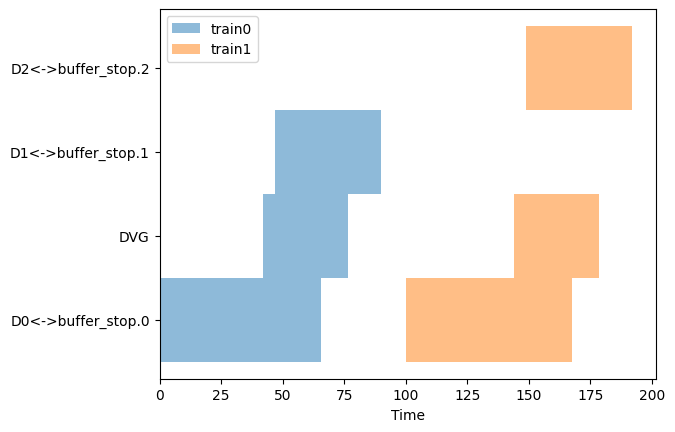

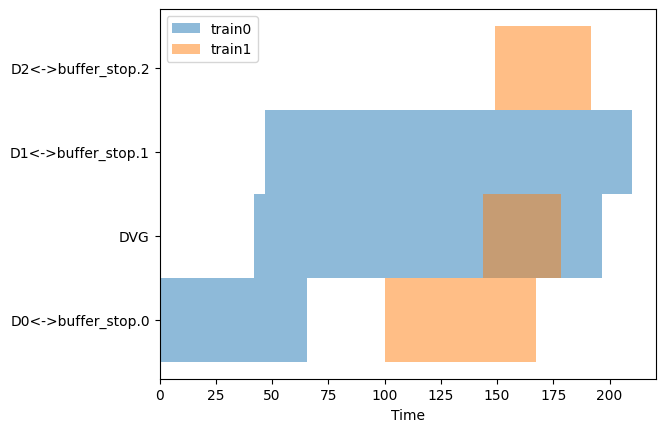

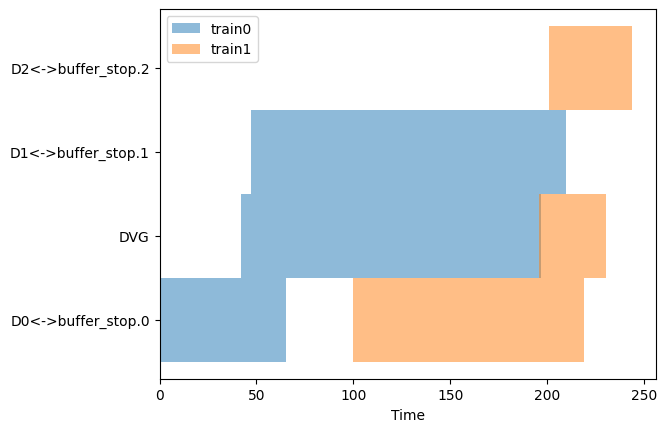

In [8]:
from pyosrd.agents.scheduler_agent import regulate_scenario

regulate_scenario("c1y2_2trains_conflict", agent1, True)
